In [60]:
# Configure Jupyter so figures appear in the notebook
%matplotlib inline

# Configure Jupyter to display the assigned value after an assignment
%config InteractiveShell.ast_node_interactivity='last_expr_or_assign'

# import functions from the modsim library
from modsim import *

import matplotlib.pyplot as plt

## Keeping Lizards Warm with Layers

In [95]:
def make_system(Tenv, kW, kP, kS,depth, delta, dt, side_length):
    """Make a system object for the Lizard model.
    
    
    returns: System object
    
    """
    init = State(S=26.7, P=26.7, W=26.7, L= 26.7)  
    
    t0 = 0
    t_end = 365*(1/dt) #in days
    dt = dt

    return System(init=init, t0=t0, t_end=t_end, Tenv=Tenv, kW=kW, kP=kP, kS=kS,
                  depth=depth, delta=delta, dt=dt, side_length=side_length)

In [96]:
def update_func(state, t, system):
    """Update the model.
    
    returns: State ()    
   
    """
    unpack(system)
    w, p, s, l = state
   
    dWdt = kW*(side_length**3)*(Tenv-w)/depth    
    dPdt = kP*((side_length-.0127)**3)*(w-p)/depth
    dSdt = kS*((side_length-.0254)**3)*(p-s)/depth
    dLdt = ((side_length-.0381)**3)*0.5*(s-l)/(delta/2)
    
    w += dWdt*dt
    p += dPdt*dt
    s += dSdt*dt
    l += dLdt*dt

    return State(L=l, S=s, W=w, P=p)

In [97]:
def run_simulation(system, update_func):
    """Runs a simulation of the system.
        
    system: System object
    update_func: function that updates state
    
    returns: TimeFrame
    """
    unpack(system)
    
    frame = TimeFrame(columns=init.index)
    frame.row[t0] = init
    
    for t in linrange(t0, t_end):
        frame.row[t+1] = update_func(frame.row[t], t, system)
        #print(frame.row[t+1])
        #print(t)
    return frame

In [98]:
def plot_results(L):
    """Plot the results of a SIR model.
    
    S: TimeSeries
    I: TimeSeries
    R: TimeSeries
    """
    plot(L, '--', label='L')
    decorate(xlabel='Time (days)',
             ylabel='Temperature')

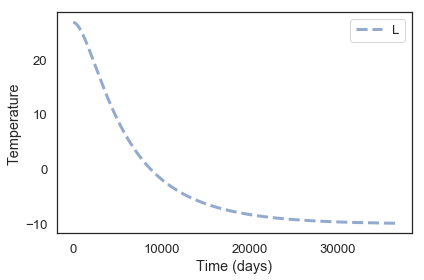

In [99]:
system = make_system(-10, .07, .05, .03, .0127, .0762, 0.01, .2032)
results = run_simulation(system, update_func)
plot_results(results.L)